In [21]:
from sklearn.cluster import KMeans
from sklearn import metrics
import numpy as np
import pandas as pd
import math
pd.set_option('display.max_colwidth', -1)

# Table Prediction

In [22]:
path = 'C:/Users/D072202/Desktop/result_data2/predicatesembedder_2019_05_29_23_06_33_455527/stratified_embeddings.csv'
df = pd.read_csv(path)
df = df[['x','y','category','origin']]
df.head()

,x,y,category,origin
0,2.844552,0.448919,http://dbkwik.webdatacommons.org/ontology/image,graph1
1,-0.756026,0.345672,http://dbkwik.webdatacommons.org/ontology/image,graph1
2,1.029704,-2.470716,http://dbkwik.webdatacommons.org/ontology/image,graph1
3,1.741779,-0.065671,http://dbkwik.webdatacommons.org/darkscape/class/item,graph1
4,1.086906,-3.118407,http://dbkwik.webdatacommons.org/ontology/image,graph1


In [23]:
df = df.loc[~(df.category=='http://www.w3.org/2000/01/rdf-schema#property') & ~(df.category=='http://www.w3.org/2000/01/rdf-schema#class')]

In [24]:
df.loc[~(df.category=='none')].head()

,x,y,category,origin
0,2.844552,0.448919,http://dbkwik.webdatacommons.org/ontology/image,graph1
1,-0.756026,0.345672,http://dbkwik.webdatacommons.org/ontology/image,graph1
2,1.029704,-2.470716,http://dbkwik.webdatacommons.org/ontology/image,graph1
3,1.741779,-0.065671,http://dbkwik.webdatacommons.org/darkscape/class/item,graph1
4,1.086906,-3.118407,http://dbkwik.webdatacommons.org/ontology/image,graph1


In [11]:
df = df.loc[df.category.isin(set(df.groupby(['category']).count().loc[:,'x'].loc[df.groupby(['category']).count().loc[:,'x']>100].index))]

In [12]:


clusters = pd.DataFrame([], columns=['x','y','label','origin'])
for cat in set(df['category'].tolist()):
    tmp = df.loc[df.category==cat]
    origin = (df.loc[df.category==cat,'origin']).iloc[0]
    model = KMeans(n_clusters=1).fit(np.array(tmp[['x','y']]))
    clusters = pd.concat([clusters, pd.DataFrame(np.concatenate( (np.array(model.cluster_centers_) , np.array([[cat, origin]]) ) , axis=1), columns=['x','y','label','origin'])])
clusters


,x,y,label,origin
0,2.1475881102916734,-0.04567508139633496,http://www.w3.org/1999/02/22-rdf-syntax-ns#pro...,graph1
0,1.0327321057893621,0.8148308534961025,http://dbkwik.webdatacommons.org/oldschoolrune...,graph2
0,0.6799902138460813,0.4719019426172064,http://dbkwik.webdatacommons.org/darkscape/cla...,graph1
0,1.851497776564037,-0.9448271960072605,http://www.w3.org/2004/02/skos/core#concept,graph1
0,1.6628676315241333,-0.46205368786306505,none,graph1
0,1.259836585204484,-0.21985228352173414,http://dbkwik.webdatacommons.org/darkscape/cla...,graph1
0,1.3843546231171886,0.36857061152270887,http://dbkwik.webdatacommons.org/oldschoolrune...,graph2
0,0.5686055020077619,-0.10398193596356944,http://dbkwik.webdatacommons.org/oldschoolrune...,graph2
0,1.726016585144449,-0.8267209553803438,http://dbkwik.webdatacommons.org/ontology/image,graph1
0,1.523288893424684,-0.91605372939791,http://dbkwik.webdatacommons.org/oldschoolrune...,graph2


In [13]:
clusters.loc[clusters.origin == 'graph1', 'cartesianproductkey1'] = 0
clusters.loc[clusters.origin == 'graph1', 'cartesianproductkey2'] = 1
clusters.loc[clusters.origin == 'graph2', 'cartesianproductkey1'] = 1
clusters.loc[clusters.origin == 'graph2', 'cartesianproductkey2'] = 0
clusters = clusters.loc[~ (clusters.label == 'none')]
clusters1 = pd.merge(clusters,clusters,left_on='cartesianproductkey1', right_on='cartesianproductkey2',how='inner')
clusters2 = pd.merge(clusters,clusters,left_on='cartesianproductkey2', right_on='cartesianproductkey1',how='inner')
clusters = pd.concat([clusters1, clusters2])
clusters = clusters.drop(['cartesianproductkey1_x'], axis=1)
clusters = clusters.drop(['cartesianproductkey2_x'], axis=1)
clusters = clusters.drop(['cartesianproductkey1_y'], axis=1)
clusters = clusters.drop(['cartesianproductkey2_y'], axis=1)
clusters.head()

,x_x,y_x,label_x,origin_x,x_y,y_y,label_y,origin_y
0,2.1475881102916734,-0.04567508139633496,http://www.w3.org/1999/02/22-rdf-syntax-ns#pro...,graph1,1.0327321057893621,0.8148308534961025,http://dbkwik.webdatacommons.org/oldschoolrune...,graph2
1,2.1475881102916734,-0.04567508139633496,http://www.w3.org/1999/02/22-rdf-syntax-ns#pro...,graph1,1.3843546231171886,0.36857061152270887,http://dbkwik.webdatacommons.org/oldschoolrune...,graph2
2,2.1475881102916734,-0.04567508139633496,http://www.w3.org/1999/02/22-rdf-syntax-ns#pro...,graph1,0.5686055020077619,-0.10398193596356944,http://dbkwik.webdatacommons.org/oldschoolrune...,graph2
3,2.1475881102916734,-0.04567508139633496,http://www.w3.org/1999/02/22-rdf-syntax-ns#pro...,graph1,1.523288893424684,-0.91605372939791,http://dbkwik.webdatacommons.org/oldschoolrune...,graph2
4,2.1475881102916734,-0.04567508139633496,http://www.w3.org/1999/02/22-rdf-syntax-ns#pro...,graph1,1.6129440358916234,-0.22770503223208444,http://dbkwik.webdatacommons.org/oldschoolrune...,graph2


In [14]:
clusters['x_x'] = clusters['x_x'].astype('float64')
clusters['x_y'] = clusters['x_y'].astype('float64')
clusters['y_x'] = clusters['y_x'].astype('float64')
clusters['y_y'] = clusters['y_y'].astype('float64')
for index, row in clusters.iterrows():
        x1 = row['x_x']
        y1 = row['y_x']
        x2 = row['x_y']
        y2 = row['y_y']
        dist = math.sqrt( (x2 - x1)**2 + (y2 - y1)**2 )
        clusters.loc[index, 'dist'] = dist
clusters = clusters.loc[clusters.dist>0.0]
clusters.head()

,x_x,y_x,label_x,origin_x,x_y,y_y,label_y,origin_y,dist
0,2.147588,-0.045675,http://www.w3.org/1999/02/22-rdf-syntax-ns#pro...,graph1,1.032732,0.814831,http://dbkwik.webdatacommons.org/oldschoolrune...,graph2,1.408323
1,2.147588,-0.045675,http://www.w3.org/1999/02/22-rdf-syntax-ns#pro...,graph1,1.384355,0.368571,http://dbkwik.webdatacommons.org/oldschoolrune...,graph2,0.868404
2,2.147588,-0.045675,http://www.w3.org/1999/02/22-rdf-syntax-ns#pro...,graph1,0.568606,-0.103982,http://dbkwik.webdatacommons.org/oldschoolrune...,graph2,1.580059
3,2.147588,-0.045675,http://www.w3.org/1999/02/22-rdf-syntax-ns#pro...,graph1,1.523289,-0.916054,http://dbkwik.webdatacommons.org/oldschoolrune...,graph2,1.071125
4,2.147588,-0.045675,http://www.w3.org/1999/02/22-rdf-syntax-ns#pro...,graph1,1.612944,-0.227705,http://dbkwik.webdatacommons.org/oldschoolrune...,graph2,0.564782


In [16]:
print('Now matching ' + str(set(clusters['label_x'])))

Now matching {'http://www.w3.org/1999/02/22-rdf-syntax-ns#property', 'http://dbkwik.webdatacommons.org/oldschoolrunescape/class/monster', 'http://dbkwik.webdatacommons.org/darkscape/class/switch', 'http://www.w3.org/2004/02/skos/core#concept', 'http://dbkwik.webdatacommons.org/darkscape/class/interactive_scenery', 'http://dbkwik.webdatacommons.org/oldschoolrunescape/class/switch', 'http://dbkwik.webdatacommons.org/oldschoolrunescape/class/non-player_character', 'http://dbkwik.webdatacommons.org/oldschoolrunescape/class/construction', 'http://dbkwik.webdatacommons.org/ontology/image', 'http://dbkwik.webdatacommons.org/darkscape/class/construction', 'http://dbkwik.webdatacommons.org/darkscape/class/item', 'http://dbkwik.webdatacommons.org/darkscape/class/monster', 'http://dbkwik.webdatacommons.org/oldschoolrunescape/class/spell', 'http://dbkwik.webdatacommons.org/oldschoolrunescape/class/item', 'http://dbkwik.webdatacommons.org/darkscape/class/bonuses', 'http://dbkwik.webdatacommons.org/

In [17]:
while len(clusters)>0:
    match = clusters.loc[clusters.dist == clusters['dist'].min()]
    clusters = clusters.drop(match.index, axis=0)
    for val in match.label_x.values:
        x = clusters.loc[(clusters.label_x == val) | (clusters.label_y == val)]
        clusters = clusters.drop(x.index, axis=0)
    print(str(match[:2].label_x.values)+"\n")

['http://dbkwik.webdatacommons.org/darkscape/class/monster'
 'http://dbkwik.webdatacommons.org/oldschoolrunescape/class/monster']

['http://dbkwik.webdatacommons.org/darkscape/class/bonuses'
 'http://dbkwik.webdatacommons.org/oldschoolrunescape/class/spell']

['http://dbkwik.webdatacommons.org/darkscape/class/switch'
 'http://dbkwik.webdatacommons.org/oldschoolrunescape/class/music']

['http://dbkwik.webdatacommons.org/darkscape/class/non-player_character'
 'http://dbkwik.webdatacommons.org/oldschoolrunescape/class/non-player_character']

['http://dbkwik.webdatacommons.org/ontology/image'
 'http://dbkwik.webdatacommons.org/oldschoolrunescape/class/shop']

['http://dbkwik.webdatacommons.org/darkscape/class/spell'
 'http://dbkwik.webdatacommons.org/oldschoolrunescape/class/bonuses']

['http://dbkwik.webdatacommons.org/darkscape/class/quest'
 'http://dbkwik.webdatacommons.org/oldschoolrunescape/class/quest']

['http://dbkwik.webdatacommons.org/darkscape/class/shop'
 'http://dbkwik.webdata

# Property Prediction


In [2]:
pd.options.display.max_colwidth = 500

In [4]:
#path = 'C:/Users/D072202/DeepAnyMatch/DeepAnyMatch/result_data/predicatesembedder_2019_05_30_12_49_02_518581/stratified_embeddings.csv'
#path = 'C:/Users/D072202/DeepAnyMatch/DeepAnyMatch/result_data/predicatesembedder_2019_05_30_20_32_59_972344/stratified_embeddings.csv'
path = 'C:/Users/D072202/DeepAnyMatch/DeepAnyMatch/result_data/predicatesembedder_2019_05_31_11_21_57_498979/stratified_embeddings.csv'

#path = 'C:/Users/D072202/Desktop/result_data2/hilti 2d alltriplessaved simpletriples_1_2019_05_27_14_03_20_890516/stratified_embeddings.csv'
df = pd.read_csv(path, encoding="UTF-8")
df.head()

,Unnamed: 0,x,y,label,category,origin
0,0,-0.874457,-0.349981,http://rdata2graph.sap.com/hilti_erp/#abb14998-c2e4-40c5-a45f-a03ba9999c36,http://rdata2graph.sap.com/hilti_erp/t179,graph1
1,1,-0.473985,-0.135864,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,none,graph1
2,2,-0.624724,0.021584,http://rdata2graph.sap.com/hilti_erp/t179,http://www.w3.org/2000/01/rdf-schema#class,graph1
3,3,-0.534281,-0.829375,http://rdata2graph.sap.com/hilti_erp/screw_6kt_m5x1_6p0_8x20#d8a2bd53-f062-4a37-b15e-5dfa9dc2101f,http://rdata2graph.sap.com/hilti_erp/mara_fert,graph1
4,4,-0.547344,-0.442974,http://rdata2graph.sap.com/hilti_erp/property/t179.id,http://www.w3.org/2000/01/rdf-schema#property,graph1


In [5]:
d = df.loc[(df.category=='http://www.w3.org/2000/01/rdf-schema#property')]#.sample(n=100)
#d = d.loc[d.label.isin(['http://rdata2graph.sap.com/hilti_erp/property/mara_fert.maktx','http://rdata2graph.sap.com/hilti_web/property/products.name','http://rdata2graph.sap.com/hilti_erp/property/mara_fert.prdha','http://rdata2graph.sap.com/hilti_web/property/categories.name',])]

import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
for i, label in enumerate(set(d.label.tolist())):
        x, y = df.loc[df.label==label,'x'].values[0], df.loc[df.label==label,'y'].values[0]
        plt.scatter(x, y)
        plt.annotate(label, xy=(x, y), xytext=(5,3),
            textcoords='offset points', ha='right', va='bottom')
plt.show()

<Figure size 600x600 with 1 Axes>

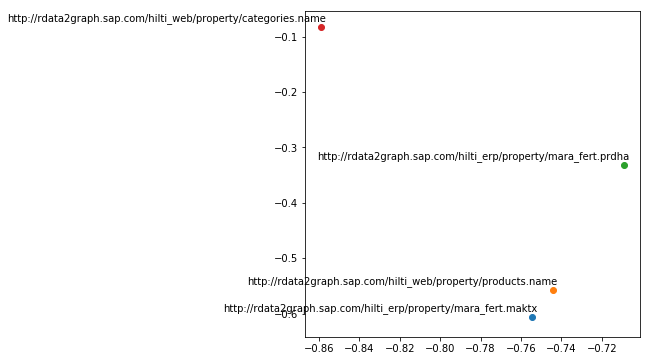

In [6]:
#d = df.loc[(df.category=='http://www.w3.org/2000/01/rdf-schema#property')].sample(n=200)
d = d.loc[d.label.isin(['http://rdata2graph.sap.com/hilti_erp/property/mara_fert.maktx','http://rdata2graph.sap.com/hilti_web/property/products.name','http://rdata2graph.sap.com/hilti_erp/property/mara_fert.prdha','http://rdata2graph.sap.com/hilti_web/property/categories.name',])]

import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
for i, label in enumerate(set(d.label.tolist())):
        x, y = df.loc[df.label==label,'x'].values[0], df.loc[df.label==label,'y'].values[0]
        plt.scatter(x, y)
        plt.annotate(label, xy=(x, y), xytext=(5,3),
            textcoords='offset points', ha='right', va='bottom')
plt.show()

In [7]:
for index, row in df.loc[(df.category=='http://www.w3.org/2000/01/rdf-schema#property') & (df.origin=='graph1')].iterrows():
    if not 'maktx' in row['label'] and not 'prdha' in row['label']:
        continue
    tempdf = dict()
    x1 = row['x']
    y1 = row['y']
    for index2, row2 in df.loc[(df.category=='http://www.w3.org/2000/01/rdf-schema#property') & (df.origin=='graph2')].iterrows():
        x2 = row2['x']
        y2 = row2['y']
        dist = math.sqrt( (x2 - x1)**2 + (y2 - y1)**2 )
        tempdf[row2['label']] = dist
    mini = list(tempdf.keys())[0]
    for k,v in tempdf.items():
        print(k + "-> " + str(v))
        if v < tempdf[mini] and not k == row['label']:
            mini = k
    print(row['label'] + ", " + mini + ", " + str(tempdf[mini]))

http://rdata2graph.sap.com/hilti_web/property/categories.id-> 0.10548630537430954
http://rdata2graph.sap.com/hilti_web/property/categories.name-> 0.5334225327755959
http://rdata2graph.sap.com/hilti_web/property/products.pid-> 0.0501856835724679
http://rdata2graph.sap.com/hilti_web/property/categories.description-> 0.2868608056109637
http://rdata2graph.sap.com/hilti_web/property/products.description-> 0.07015530748670389
http://rdata2graph.sap.com/hilti_web/property/products.name-> 0.04991413798933046
http://rdata2graph.sap.com/hilti_erp/property/mara_fert.maktx, http://rdata2graph.sap.com/hilti_web/property/products.name, 0.04991413798933046
http://rdata2graph.sap.com/hilti_web/property/categories.id-> 0.1883965699988383
http://rdata2graph.sap.com/hilti_web/property/categories.name-> 0.2910012560727802
http://rdata2graph.sap.com/hilti_web/property/products.pid-> 0.28120093980679056
http://rdata2graph.sap.com/hilti_web/property/categories.description-> 0.30643644987755286
http://rdata2g

In [8]:
import numpy as np

In [27]:
a = df.loc[(df.category=='http://www.w3.org/2000/01/rdf-schema#property') & (df.origin=='graph1')]
b = df.loc[(df.category=='http://www.w3.org/2000/01/rdf-schema#property') & (df.origin=='graph2')]
a.loc[:,'mergekey'] = 0
b.loc[:,'mergekey'] = 0
c = a.merge(b, left_on='mergekey',right_on='mergekey')
c['diff'] = ( (c.x_x - c.x_y).pow(2) + (c.y_x - c.y_y).pow(2) ).apply(np.sqrt)
c['diff'] = c['diff'].abs()
import sklearn
cos_sim = sklearn.metrics.pairwise.cosine_similarity(c[['x_x','y_x']], c[['x_y','y_x']])
c['cos_diff'] = pd.DataFrame(cos_sim[0,:])
c['cos_diff'] = c['cos_diff'].abs()

c.head()

C:\Users\D072202\AppData\Local\Continuum\anaconda3\envs\py36\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\D072202\AppData\Local\Continuum\anaconda3\envs\py36\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Unnamed: 0_x,x_x,y_x,label_x,category_x,origin_x,mergekey,Unnamed: 0_y,x_y,y_y,label_y,category_y,origin_y,diff,cos_diff
0,4,-0.547344,-0.442974,http://rdata2graph.sap.com/hilti_erp/property/t179.id,http://www.w3.org/2000/01/rdf-schema#property,graph1,0,12311,-0.784524,-0.504592,http://rdata2graph.sap.com/hilti_web/property/categories.id,http://www.w3.org/2000/01/rdf-schema#property,graph2,0.245054,0.986190
1,4,-0.547344,-0.442974,http://rdata2graph.sap.com/hilti_erp/property/t179.id,http://www.w3.org/2000/01/rdf-schema#property,graph1,0,12505,-0.858986,-0.082620,http://rdata2graph.sap.com/hilti_web/property/categories.name,http://www.w3.org/2000/01/rdf-schema#property,graph2,0.476420,0.979209
2,4,-0.547344,-0.442974,http://rdata2graph.sap.com/hilti_erp/property/t179.id,http://www.w3.org/2000/01/rdf-schema#property,graph1,0,12837,-0.704806,-0.613164,http://rdata2graph.sap.com/hilti_web/property/products.pid,http://www.w3.org/2000/01/rdf-schema#property,graph2,0.231860,0.992895
3,4,-0.547344,-0.442974,http://rdata2graph.sap.com/hilti_erp/property/t179.id,http://www.w3.org/2000/01/rdf-schema#property,graph1,0,13314,-0.993177,-0.446666,http://rdata2graph.sap.com/hilti_web/property/categories.description,http://www.w3.org/2000/01/rdf-schema#property,graph2,0.445848,0.966169
4,4,-0.547344,-0.442974,http://rdata2graph.sap.com/hilti_erp/property/t179.id,http://www.w3.org/2000/01/rdf-schema#property,graph1,0,13450,-0.734905,-0.673078,http://rdata2graph.sap.com/hilti_web/property/products.description,http://www.w3.org/2000/01/rdf-schema#property,graph2,0.296862,0.990500


In [28]:

c=c.sort_values(by=['diff'])
c.head(10)

,Unnamed: 0_x,x_x,y_x,label_x,category_x,origin_x,mergekey,Unnamed: 0_y,x_y,y_y,label_y,category_y,origin_y,diff,cos_diff
888,6495,-0.781381,-0.503802,http://rdata2graph.sap.com/hilti_erp/property/mara_fert./vso/r_tol_b_ht,http://www.w3.org/2000/01/rdf-schema#property,graph1,0,12311,-0.784524,-0.504592,http://rdata2graph.sap.com/hilti_web/property/categories.id,http://www.w3.org/2000/01/rdf-schema#property,graph2,0.003240,0.994006
316,2584,-0.742362,-0.667451,http://rdata2graph.sap.com/hilti_erp/property/mara_fert.hoehe,http://www.w3.org/2000/01/rdf-schema#property,graph1,0,13450,-0.734905,-0.673078,http://rdata2graph.sap.com/hilti_web/property/products.description,http://www.w3.org/2000/01/rdf-schema#property,graph2,0.009343,0.998379
353,3013,-0.731946,-0.553772,http://rdata2graph.sap.com/hilti_erp/property/mara_fert./dsd/sv_cnt_grp,http://www.w3.org/2000/01/rdf-schema#property,graph1,0,13701,-0.744366,-0.556808,http://rdata2graph.sap.com/hilti_web/property/products.name,http://www.w3.org/2000/01/rdf-schema#property,graph2,0.012785,0.999169
875,6465,-0.758207,-0.549899,http://rdata2graph.sap.com/hilti_erp/property/mara_fert.pilferable,http://www.w3.org/2000/01/rdf-schema#property,graph1,0,13701,-0.744366,-0.556808,http://rdata2graph.sap.com/hilti_web/property/products.name,http://www.w3.org/2000/01/rdf-schema#property,graph2,0.015470,0.999026
869,6461,-0.761659,-0.556520,http://rdata2graph.sap.com/hilti_erp/property/mara_fert.maxl,http://www.w3.org/2000/01/rdf-schema#property,graph1,0,13701,-0.744366,-0.556808,http://rdata2graph.sap.com/hilti_web/property/products.name,http://www.w3.org/2000/01/rdf-schema#property,graph2,0.017296,0.999263
852,6420,-0.768008,-0.498067,http://rdata2graph.sap.com/hilti_erp/property/mara_fert.etiag,http://www.w3.org/2000/01/rdf-schema#property,graph1,0,12311,-0.784524,-0.504592,http://rdata2graph.sap.com/hilti_web/property/categories.id,http://www.w3.org/2000/01/rdf-schema#property,graph2,0.017758,0.993425
1745,9881,-0.738639,-0.535691,http://rdata2graph.sap.com/hilti_erp/property/mara_fert.saisj,http://www.w3.org/2000/01/rdf-schema#property,graph1,0,13701,-0.744366,-0.556808,http://rdata2graph.sap.com/hilti_web/property/products.name,http://www.w3.org/2000/01/rdf-schema#property,graph2,0.021879,0.998399
2245,12124,-0.836013,-0.074702,http://rdata2graph.sap.com/hilti_erp/property/mara_fert./cwm/valum,http://www.w3.org/2000/01/rdf-schema#property,graph1,0,12505,-0.858986,-0.082620,http://rdata2graph.sap.com/hilti_web/property/categories.name,http://www.w3.org/2000/01/rdf-schema#property,graph2,0.024299,0.828905
1304,8173,-0.710893,-0.587258,http://rdata2graph.sap.com/hilti_erp/property/mara_fert.free_char,http://www.w3.org/2000/01/rdf-schema#property,graph1,0,12837,-0.704806,-0.613164,http://rdata2graph.sap.com/hilti_web/property/products.pid,http://www.w3.org/2000/01/rdf-schema#property,graph2,0.026612,0.999898
863,6447,-0.763187,-0.537630,http://rdata2graph.sap.com/hilti_erp/property/mara_fert.labor,http://www.w3.org/2000/01/rdf-schema#property,graph1,0,13701,-0.744366,-0.556808,http://rdata2graph.sap.com/hilti_web/property/products.name,http://www.w3.org/2000/01/rdf-schema#property,graph2,0.026871,0.998494


In [29]:
props = list()
relation_props = list()
getprops('C:/Users/D072202/RData2Graph/rdata2graph/data/sap_hilti_data/MARA_FERT')
getprops('C:/Users/D072202/RData2Graph/rdata2graph/data/sap_hilti_data/V137')
getprops('C:/Users/D072202/RData2Graph/rdata2graph/data/sap_hilti_data/T006')
getprops('C:/Users/D072202/RData2Graph/rdata2graph/data/sap_hilti_data/T023')
getprops('C:/Users/D072202/RData2Graph/rdata2graph/data/sap_hilti_data/T179')

In [30]:

def getprops(path):
    with open(path, mode="r", encoding="UTF-8") as f:
        for line in f:
            line = line.split(",")
            for prop in line:
                try:
                    p = prop.split(";")[1]
                    if p=="":
                        p = prop.split(";")[0].split(".")[1]
                        props.append(p)
                    else:
                        props.append(p)
                        relation_props.append(p)
                except:
                    pass
            break

In [31]:
for i in range(len(props)):
    props[i] = "."+props[i]
props

['.MBRSH',
 '.MATKL',
 '.PRDHA',
 '.MAKTX',
 '.id',
 '.id',
 '.Branchenbezeichnung',
 '.MBr',
 '.BBr',
 '.FlRef',
 '.MANDT',
 '.id',
 '.KZEX3',
 '.KZEX6',
 '.ANDEC',
 '.KZKEH',
 '.KZWOB',
 '.KZ1EH',
 '.KZ2EH',
 '.DIMID',
 '.ZAEHL',
 '.NENNR',
 '.EXP10',
 '.ADDKO',
 '.EXPON',
 '.DECAN',
 '.ISOCODE',
 '.PRIMARY',
 '.TEMP_VALUE',
 '.TEMP_UNIT',
 '.FAMUNIT',
 '.PRESS_VAL',
 '.PRESS_UNIT',
 '.MSEH3',
 '.MSEH6',
 '.MSEHT',
 '.MANDT',
 '.id',
 '.BEGRU',
 '.GEWEI',
 '.EKWSL',
 '.ZZ_EKGRP',
 '.ZZ_INACTIVE',
 '.WGBEZ',
 '.id',
 '.Description',
 '.levelno']

In [32]:
for i in range(len(relation_props)):
    relation_props[i] = "."+relation_props[i]
relation_props

['.MBRSH', '.MATKL', '.PRDHA', '.id', '.id', '.id', '.id', '.id']

In [33]:
tmp = c
for index, row in tmp.iterrows():
    found_x = False
    found_y = False
    for p in props:
        if p.lower() == row.label_x.lower()[-len(p.lower()):]:
            found_x = True
    if found_x:
        pass
    else:
        c = c.loc[~(c.index==index)]
c.head(20)

,Unnamed: 0_x,x_x,y_x,label_x,category_x,origin_x,mergekey,Unnamed: 0_y,x_y,y_y,label_y,category_y,origin_y,diff,cos_diff
1673,9665,-0.756993,-0.593580,http://rdata2graph.sap.com/hilti_erp/property/t006.dimid,http://www.w3.org/2000/01/rdf-schema#property,graph1,0,13701,-0.744366,-0.556808,http://rdata2graph.sap.com/hilti_web/property/products.name,http://www.w3.org/2000/01/rdf-schema#property,graph2,0.038880,0.999974
839,6381,-0.754433,-0.605696,http://rdata2graph.sap.com/hilti_erp/property/mara_fert.maktx,http://www.w3.org/2000/01/rdf-schema#property,graph1,0,13701,-0.744366,-0.556808,http://rdata2graph.sap.com/hilti_web/property/products.name,http://www.w3.org/2000/01/rdf-schema#property,graph2,0.049914,0.999996
836,6381,-0.754433,-0.605696,http://rdata2graph.sap.com/hilti_erp/property/mara_fert.maktx,http://www.w3.org/2000/01/rdf-schema#property,graph1,0,12837,-0.704806,-0.613164,http://rdata2graph.sap.com/hilti_web/property/products.pid,http://www.w3.org/2000/01/rdf-schema#property,graph2,0.050186,0.999564
683,5360,-0.731206,-0.507468,http://rdata2graph.sap.com/hilti_erp/property/t006.zaehl,http://www.w3.org/2000/01/rdf-schema#property,graph1,0,13701,-0.744366,-0.556808,http://rdata2graph.sap.com/hilti_web/property/products.name,http://www.w3.org/2000/01/rdf-schema#property,graph2,0.051065,0.996638
678,5360,-0.731206,-0.507468,http://rdata2graph.sap.com/hilti_erp/property/t006.zaehl,http://www.w3.org/2000/01/rdf-schema#property,graph1,0,12311,-0.784524,-0.504592,http://rdata2graph.sap.com/hilti_web/property/categories.id,http://www.w3.org/2000/01/rdf-schema#property,graph2,0.053395,0.994362
471,3883,-1.040699,-0.471921,http://rdata2graph.sap.com/hilti_erp/property/t006.kzkeh,http://www.w3.org/2000/01/rdf-schema#property,graph1,0,13314,-0.993177,-0.446666,http://rdata2graph.sap.com/hilti_web/property/categories.description,http://www.w3.org/2000/01/rdf-schema#property,graph2,0.053816,0.972090
1670,9665,-0.756993,-0.593580,http://rdata2graph.sap.com/hilti_erp/property/t006.dimid,http://www.w3.org/2000/01/rdf-schema#property,graph1,0,12837,-0.704806,-0.613164,http://rdata2graph.sap.com/hilti_web/property/products.pid,http://www.w3.org/2000/01/rdf-schema#property,graph2,0.055741,0.999809
838,6381,-0.754433,-0.605696,http://rdata2graph.sap.com/hilti_erp/property/mara_fert.maktx,http://www.w3.org/2000/01/rdf-schema#property,graph1,0,13450,-0.734905,-0.673078,http://rdata2graph.sap.com/hilti_web/property/products.description,http://www.w3.org/2000/01/rdf-schema#property,graph2,0.070155,0.999960
1160,7671,-0.643991,-0.574838,http://rdata2graph.sap.com/hilti_erp/property/v137.mbr,http://www.w3.org/2000/01/rdf-schema#property,graph1,0,12837,-0.704806,-0.613164,http://rdata2graph.sap.com/hilti_web/property/products.pid,http://www.w3.org/2000/01/rdf-schema#property,graph2,0.071885,0.999993
1184,7749,-0.632007,-0.579159,http://rdata2graph.sap.com/hilti_erp/property/v137.bbr,http://www.w3.org/2000/01/rdf-schema#property,graph1,0,12837,-0.704806,-0.613164,http://rdata2graph.sap.com/hilti_web/property/products.pid,http://www.w3.org/2000/01/rdf-schema#property,graph2,0.080350,0.999972


In [34]:
tmp = c
for index, row in tmp.iterrows():
    found_x = False
    for p in relation_props:
        if p.lower() == row.label_x.lower()[-len(p.lower()):]:
            found_x = True
    if found_x:
        c = c.loc[~(c.index==index)]
c.head(20)

,Unnamed: 0_x,x_x,y_x,label_x,category_x,origin_x,mergekey,Unnamed: 0_y,x_y,y_y,label_y,category_y,origin_y,diff,cos_diff
1673,9665,-0.756993,-0.593580,http://rdata2graph.sap.com/hilti_erp/property/t006.dimid,http://www.w3.org/2000/01/rdf-schema#property,graph1,0,13701,-0.744366,-0.556808,http://rdata2graph.sap.com/hilti_web/property/products.name,http://www.w3.org/2000/01/rdf-schema#property,graph2,0.038880,0.999974
839,6381,-0.754433,-0.605696,http://rdata2graph.sap.com/hilti_erp/property/mara_fert.maktx,http://www.w3.org/2000/01/rdf-schema#property,graph1,0,13701,-0.744366,-0.556808,http://rdata2graph.sap.com/hilti_web/property/products.name,http://www.w3.org/2000/01/rdf-schema#property,graph2,0.049914,0.999996
836,6381,-0.754433,-0.605696,http://rdata2graph.sap.com/hilti_erp/property/mara_fert.maktx,http://www.w3.org/2000/01/rdf-schema#property,graph1,0,12837,-0.704806,-0.613164,http://rdata2graph.sap.com/hilti_web/property/products.pid,http://www.w3.org/2000/01/rdf-schema#property,graph2,0.050186,0.999564
683,5360,-0.731206,-0.507468,http://rdata2graph.sap.com/hilti_erp/property/t006.zaehl,http://www.w3.org/2000/01/rdf-schema#property,graph1,0,13701,-0.744366,-0.556808,http://rdata2graph.sap.com/hilti_web/property/products.name,http://www.w3.org/2000/01/rdf-schema#property,graph2,0.051065,0.996638
678,5360,-0.731206,-0.507468,http://rdata2graph.sap.com/hilti_erp/property/t006.zaehl,http://www.w3.org/2000/01/rdf-schema#property,graph1,0,12311,-0.784524,-0.504592,http://rdata2graph.sap.com/hilti_web/property/categories.id,http://www.w3.org/2000/01/rdf-schema#property,graph2,0.053395,0.994362
471,3883,-1.040699,-0.471921,http://rdata2graph.sap.com/hilti_erp/property/t006.kzkeh,http://www.w3.org/2000/01/rdf-schema#property,graph1,0,13314,-0.993177,-0.446666,http://rdata2graph.sap.com/hilti_web/property/categories.description,http://www.w3.org/2000/01/rdf-schema#property,graph2,0.053816,0.972090
1670,9665,-0.756993,-0.593580,http://rdata2graph.sap.com/hilti_erp/property/t006.dimid,http://www.w3.org/2000/01/rdf-schema#property,graph1,0,12837,-0.704806,-0.613164,http://rdata2graph.sap.com/hilti_web/property/products.pid,http://www.w3.org/2000/01/rdf-schema#property,graph2,0.055741,0.999809
838,6381,-0.754433,-0.605696,http://rdata2graph.sap.com/hilti_erp/property/mara_fert.maktx,http://www.w3.org/2000/01/rdf-schema#property,graph1,0,13450,-0.734905,-0.673078,http://rdata2graph.sap.com/hilti_web/property/products.description,http://www.w3.org/2000/01/rdf-schema#property,graph2,0.070155,0.999960
1160,7671,-0.643991,-0.574838,http://rdata2graph.sap.com/hilti_erp/property/v137.mbr,http://www.w3.org/2000/01/rdf-schema#property,graph1,0,12837,-0.704806,-0.613164,http://rdata2graph.sap.com/hilti_web/property/products.pid,http://www.w3.org/2000/01/rdf-schema#property,graph2,0.071885,0.999993
1184,7749,-0.632007,-0.579159,http://rdata2graph.sap.com/hilti_erp/property/v137.bbr,http://www.w3.org/2000/01/rdf-schema#property,graph1,0,12837,-0.704806,-0.613164,http://rdata2graph.sap.com/hilti_web/property/products.pid,http://www.w3.org/2000/01/rdf-schema#property,graph2,0.080350,0.999972


In [35]:
while len(c)>0:
    lbl_x = c.iloc[0].label_x
    lbl_y = c.iloc[0].label_y
    c = c.loc[~(c.label_x==lbl_x) & ~(c.label_y==lbl_y)]
    print(lbl_x + ", " + lbl_y)

http://rdata2graph.sap.com/hilti_erp/property/t006.dimid, http://rdata2graph.sap.com/hilti_web/property/products.name
http://rdata2graph.sap.com/hilti_erp/property/mara_fert.maktx, http://rdata2graph.sap.com/hilti_web/property/products.pid
http://rdata2graph.sap.com/hilti_erp/property/t006.zaehl, http://rdata2graph.sap.com/hilti_web/property/categories.id
http://rdata2graph.sap.com/hilti_erp/property/t006.kzkeh, http://rdata2graph.sap.com/hilti_web/property/categories.description
http://rdata2graph.sap.com/hilti_erp/property/t006.isocode, http://rdata2graph.sap.com/hilti_web/property/products.description
http://rdata2graph.sap.com/hilti_erp/property/t006.decan, http://rdata2graph.sap.com/hilti_web/property/categories.name


## Property matching by average

In [118]:
#path = 'C:/Users/D072202/DeepAnyMatch/DeepAnyMatch/result_data/predicatesembedder_2019_05_30_12_49_02_518581/stratified_embeddings.csv'
#path = 'C:/Users/D072202/DeepAnyMatch/DeepAnyMatch/result_data/predicatesembedder_2019_05_30_20_32_59_972344/stratified_embeddings.csv'
path = 'C:/Users/D072202/DeepAnyMatch/DeepAnyMatch/result_data/predicatesembedder_2019_05_31_13_25_45_684831/predicate_embeddings.csv'

#path = 'C:/Users/D072202/Desktop/result_data2/hilti 2d alltriplessaved simpletriples_1_2019_05_27_14_03_20_890516/stratified_embeddings.csv'
df = pd.read_csv(path, encoding="UTF-8")
df.head()

,Unnamed: 0,x,y,label,original_label,origin
0,0,1.583728,-1.759576,http://rdata2graph.sap.com/hilti_erp/property/mara_fert.maktx0,http://rdata2graph.sap.com/hilti_erp/property/mara_fert.maktx,graph1
1,1,0.608689,-0.824827,http://rdata2graph.sap.com/hilti_erp/property/v137.id1,http://rdata2graph.sap.com/hilti_erp/property/v137.id,graph1
2,2,0.579716,-0.814725,http://rdata2graph.sap.com/hilti_erp/property/t023.id2,http://rdata2graph.sap.com/hilti_erp/property/t023.id,graph1
3,3,1.469065,-1.333530,http://rdata2graph.sap.com/hilti_erp/property/t179.id3,http://rdata2graph.sap.com/hilti_erp/property/t179.id,graph1
4,4,0.617569,-0.866903,http://www.w3.org/1999/02/22-rdf-syntax-ns#type4,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,graph1


In [119]:
clusters = pd.DataFrame([], columns=['x','y','label','origin'])
for original_label in set(df['original_label'].tolist()):
    tmp = df.loc[df.original_label==original_label]
    origin = (df.loc[df.original_label==original_label,'origin']).iloc[0]
    model = KMeans(n_clusters=1).fit(np.array(tmp[['x','y']]))
    clusters = pd.concat([clusters, pd.DataFrame(np.concatenate( (np.array(model.cluster_centers_) , np.array([[original_label, origin]]) ) , axis=1), columns=['x','y','label','origin'])])
clusters


,x,y,label,origin
0,-1.5742232902472617,-2.0840017424394186,http://rdata2graph.sap.com/hilti_erp/property/t023.wgbez,graph1
0,0.2636454224543861,-2.3822720499409447,http://rdata2graph.sap.com/hilti_erp/property/t179.description,graph1
0,0.008407227973534622,-1.3295423509658937,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,graph1
0,-0.025851954679402493,-1.3022899050982704,http://rdata2graph.sap.com/hilti_erp/property/t023.id,graph1
0,-0.05049706433333332,-0.8105403766666667,http://rdata2graph.sap.com/hilti_erp/property/v137.mbr,graph1
0,-0.5137308975086486,-1.3231408395405406,http://www.w3.org/2000/01/rdf-schema#comment,graph1
0,0.043115388122302235,-3.062463104556355,http://rdata2graph.sap.com/hilti_web/property/categories.description,graph2
0,0.05199309379064747,-2.3042384270983214,http://rdata2graph.sap.com/hilti_web/property/categories.name,graph2
0,0.4894172428603744,-2.1389125085829384,http://rdata2graph.sap.com/hilti_web/property/products.description,graph2
0,0.0944975744139151,-1.3209951341981132,http://rdata2graph.sap.com/hilti_erp/property/t179.id,graph1


In [120]:
clusters.loc[clusters.origin == 'graph1', 'cartesianproductkey1'] = 0
clusters.loc[clusters.origin == 'graph1', 'cartesianproductkey2'] = 1
clusters.loc[clusters.origin == 'graph2', 'cartesianproductkey1'] = 1
clusters.loc[clusters.origin == 'graph2', 'cartesianproductkey2'] = 0
clusters = clusters.loc[~ (clusters.label == 'none')]
clusters1 = pd.merge(clusters,clusters,left_on='cartesianproductkey1', right_on='cartesianproductkey2',how='inner')
clusters2 = pd.merge(clusters,clusters,left_on='cartesianproductkey2', right_on='cartesianproductkey1',how='inner')
clusters = pd.concat([clusters1, clusters2])
clusters = clusters.drop(['cartesianproductkey1_x'], axis=1)
clusters = clusters.drop(['cartesianproductkey2_x'], axis=1)
clusters = clusters.drop(['cartesianproductkey1_y'], axis=1)
clusters = clusters.drop(['cartesianproductkey2_y'], axis=1)
clusters.head()

,x_x,y_x,label_x,origin_x,x_y,y_y,label_y,origin_y
0,-1.5742232902472617,-2.0840017424394186,http://rdata2graph.sap.com/hilti_erp/property/t023.wgbez,graph1,0.043115388122302235,-3.062463104556355,http://rdata2graph.sap.com/hilti_web/property/categories.description,graph2
1,-1.5742232902472617,-2.0840017424394186,http://rdata2graph.sap.com/hilti_erp/property/t023.wgbez,graph1,0.05199309379064747,-2.3042384270983214,http://rdata2graph.sap.com/hilti_web/property/categories.name,graph2
2,-1.5742232902472617,-2.0840017424394186,http://rdata2graph.sap.com/hilti_erp/property/t023.wgbez,graph1,0.4894172428603744,-2.1389125085829384,http://rdata2graph.sap.com/hilti_web/property/products.description,graph2
3,-1.5742232902472617,-2.0840017424394186,http://rdata2graph.sap.com/hilti_erp/property/t023.wgbez,graph1,0.4442275019362275,-1.7549849080616113,http://rdata2graph.sap.com/hilti_web/property/products.name,graph2
4,-1.5742232902472617,-2.0840017424394186,http://rdata2graph.sap.com/hilti_erp/property/t023.wgbez,graph1,0.25764978395335547,-1.1355437338246446,http://rdata2graph.sap.com/hilti_web/property/products.pid,graph2


In [121]:
clusters['x_x'] = clusters['x_x'].astype('float64')
clusters['x_y'] = clusters['x_y'].astype('float64')
clusters['y_x'] = clusters['y_x'].astype('float64')
clusters['y_y'] = clusters['y_y'].astype('float64')
for index, row in clusters.iterrows():
        x1 = row['x_x']
        y1 = row['y_x']
        x2 = row['x_y']
        y2 = row['y_y']
        dist = math.sqrt( (x2 - x1)**2 + (y2 - y1)**2 )
        clusters.loc[index, 'dist'] = dist
clusters = clusters.loc[clusters.dist>0.0]
clusters.head()

,x_x,y_x,label_x,origin_x,x_y,y_y,label_y,origin_y,dist
0,-1.574223,-2.084002,http://rdata2graph.sap.com/hilti_erp/property/t023.wgbez,graph1,0.043115,-3.062463,http://rdata2graph.sap.com/hilti_web/property/categories.description,graph2,1.890283
1,-1.574223,-2.084002,http://rdata2graph.sap.com/hilti_erp/property/t023.wgbez,graph1,0.051993,-2.304238,http://rdata2graph.sap.com/hilti_web/property/categories.name,graph2,1.641062
2,-1.574223,-2.084002,http://rdata2graph.sap.com/hilti_erp/property/t023.wgbez,graph1,0.489417,-2.138913,http://rdata2graph.sap.com/hilti_web/property/products.description,graph2,2.064371
3,-1.574223,-2.084002,http://rdata2graph.sap.com/hilti_erp/property/t023.wgbez,graph1,0.444228,-1.754985,http://rdata2graph.sap.com/hilti_web/property/products.name,graph2,2.045091
4,-1.574223,-2.084002,http://rdata2graph.sap.com/hilti_erp/property/t023.wgbez,graph1,0.257650,-1.135544,http://rdata2graph.sap.com/hilti_web/property/products.pid,graph2,2.062845


In [122]:
print('Now matching ' + str(set(clusters['label_x'])))

Now matching {'http://rdata2graph.sap.com/hilti_erp/property/t023.wgbez', 'http://rdata2graph.sap.com/hilti_erp/property/t179.description', 'http://www.w3.org/1999/02/22-rdf-syntax-ns#type', 'http://rdata2graph.sap.com/hilti_erp/property/t023.id', 'http://rdata2graph.sap.com/hilti_erp/property/v137.mbr', 'http://www.w3.org/2000/01/rdf-schema#comment', 'http://rdata2graph.sap.com/hilti_web/property/categories.description', 'http://rdata2graph.sap.com/hilti_web/property/categories.name', 'http://rdata2graph.sap.com/hilti_web/property/products.description', 'http://rdata2graph.sap.com/hilti_erp/property/t179.id', 'http://rdata2graph.sap.com/hilti_erp/property/mara_fert.maktx', 'http://rdata2graph.sap.com/hilti_erp/property/v137.branchenbezeichnung', 'http://rdata2graph.sap.com/hilti_erp/property/t023.wgbez60', 'http://rdata2graph.sap.com/hilti_erp/property/t023.mandt', 'http://rdata2graph.sap.com/hilti_erp/property/t179.levelno', 'http://rdata2graph.sap.com/hilti_erp/property/t023.zz_ekgr

In [123]:
mappings = list()
dists = list()
while len(clusters)>0:
    match = clusters.loc[clusters.dist == clusters['dist'].min()]
    clusters = clusters.drop(match.index, axis=0)
    dists.append(match.dist.values[0])
    for val in match.label_x.values:
        x = clusters.loc[(clusters.label_x == val) | (clusters.label_y == val)]
        clusters = clusters.drop(x.index, axis=0)
    mappings.append((str(match[:2].label_x.values)))

In [126]:
model = KMeans(n_clusters=2).fit(np.array(dists).reshape(-1,1))

In [131]:
for mapping in mappings[:list(model.predict(np.array(dists).reshape(-1,1))).index(1)]:
    print(mapping)

['http://rdata2graph.sap.com/hilti_erp/property/t179.levelno'
 'http://rdata2graph.sap.com/hilti_web/property/products.pid']
['http://rdata2graph.sap.com/hilti_erp/property/t179.description'
 'http://rdata2graph.sap.com/hilti_web/property/categories.name']
['http://rdata2graph.sap.com/hilti_erp/property/mara_fert.maktx'
 'http://rdata2graph.sap.com/hilti_web/property/products.name']
['http://rdata2graph.sap.com/hilti_erp/property/t179.id'
 'http://rdata2graph.sap.com/hilti_web/property/categories.id']
